<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.664690,42.086579,47.421143,79.732825,0.011802,219.917038,219.911387,0.005652
1,0.0,1.0,52.017351,50.939145,86.178392,23.767992,-0.001664,222.901216,222.899828,0.001388
2,0.0,2.0,72.102466,22.476140,49.113635,69.911700,-0.017909,223.586033,223.608188,-0.022155
3,0.0,3.0,75.890914,96.446265,51.757535,62.818481,0.000866,296.914062,296.911758,0.002303
4,0.0,4.0,49.494715,88.537354,56.914424,51.718543,-0.017017,256.648019,256.663856,-0.015838
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.002620,70.411618,38.314412,48.412053,0.004677,228.145379,228.141160,0.004219
249996,999.0,246.0,99.115575,72.505468,23.822937,76.774903,0.007131,282.226014,282.219604,0.006410
249997,999.0,247.0,71.774002,23.211031,70.272907,79.198608,-0.010044,254.446505,254.458163,-0.011658
249998,999.0,248.0,24.486097,63.824958,87.215534,84.348868,-0.017911,269.857546,269.873677,-0.016131


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.664690,42.086579,47.421143,79.732825,0.011802,219.917038,219.911387,0.005652
1,0.0,1.0,52.017351,50.939145,86.178392,23.767992,-0.001664,222.901216,222.899828,0.001388
2,0.0,2.0,72.102466,22.476140,49.113635,69.911700,-0.017909,223.586033,223.608188,-0.022155
3,0.0,3.0,75.890914,96.446265,51.757535,62.818481,0.000866,296.914062,296.911758,0.002303
4,0.0,4.0,49.494715,88.537354,56.914424,51.718543,-0.017017,256.648019,256.663856,-0.015838
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.002620,70.411618,38.314412,48.412053,0.004677,228.145379,228.141160,0.004219
249996,999.0,246.0,99.115575,72.505468,23.822937,76.774903,0.007131,282.226014,282.219604,0.006410
249997,999.0,247.0,71.774002,23.211031,70.272907,79.198608,-0.010044,254.446505,254.458163,-0.011658
249998,999.0,248.0,24.486097,63.824958,87.215534,84.348868,-0.017911,269.857546,269.873677,-0.016131


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,40.664690,42.086579,47.421143,79.732825,0.011802,219.917038,219.911387,0.005652
1,0.0,1.0,52.017351,50.939145,86.178392,23.767992,-0.001664,222.901216,222.899828,0.001388
2,0.0,2.0,72.102466,22.476140,49.113635,69.911700,-0.017909,223.586033,223.608188,-0.022155
3,0.0,3.0,75.890914,96.446265,51.757535,62.818481,0.000866,296.914062,296.911758,0.002303
4,0.0,4.0,49.494715,88.537354,56.914424,51.718543,-0.017017,256.648019,256.663856,-0.015838
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.002620,70.411618,38.314412,48.412053,0.004677,228.145379,228.141160,0.004219
249996,999.0,246.0,99.115575,72.505468,23.822937,76.774903,0.007131,282.226014,282.219604,0.006410
249997,999.0,247.0,71.774002,23.211031,70.272907,79.198608,-0.010044,254.446505,254.458163,-0.011658
249998,999.0,248.0,24.486097,63.824958,87.215534,84.348868,-0.017911,269.857546,269.873677,-0.016131


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    40.664690  42.086579  47.421143  79.732825  0.011802  219.917038   
      1.0    52.017351  50.939145  86.178392  23.767992 -0.001664  222.901216   
      2.0    72.102466  22.476140  49.113635  69.911700 -0.017909  223.586033   
      3.0    75.890914  96.446265  51.757535  62.818481  0.000866  296.914062   
      4.0    49.494715  88.537354  56.914424  51.718543 -0.017017  256.648019   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  61.002620  70.411618  38.314412  48.412053  0.004677  228.145379   
      246.0  99.115575  72.505468  23.822937  76.774903  0.007131  282.226014   
      247.0  71.774002  23.211031  70.272907  79.198608 -0.010044  254.446505   
      248.0  24.486097  63.824958  87.215534  84.348868 -0.017911  269.857546   
      249.0  38.790373  37.957584  51.481393  63.361817  0.036028  201.627194   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    219.911387  0.005652  
      1.0    222.899828  0.001388  
      2.0    223.608188 -0.022155  
      3.0    296.911758  0.002303  
      4.0    256.663856 -0.015838  
...                 ...       ...  
999.0 245.0  228.141160  0.004219  
      246.0  282.219604  0.006410  
      247.0  254.458163 -0.011658  
      248.0  269.873677 -0.016131  
      249.0  201.593906  0.033288  

[250000 rows x 8 columns]

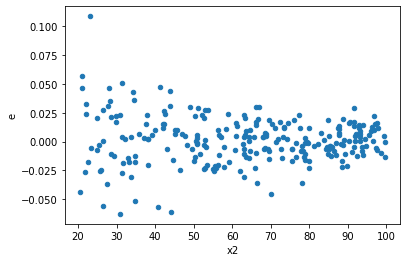

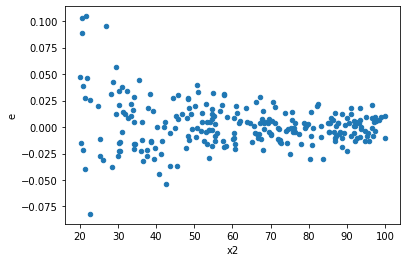

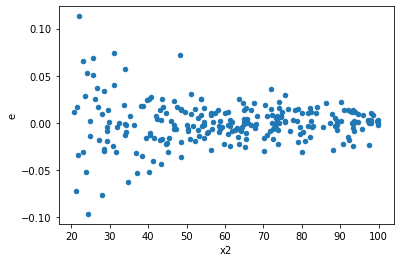

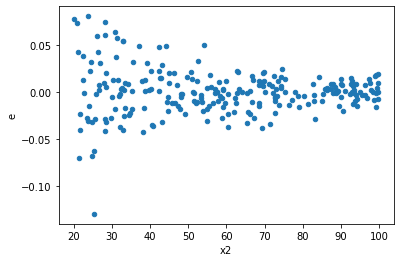

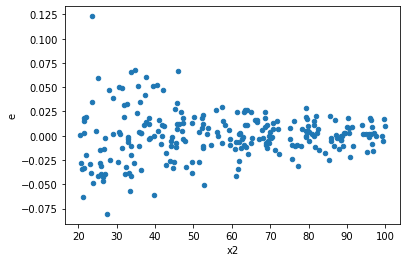

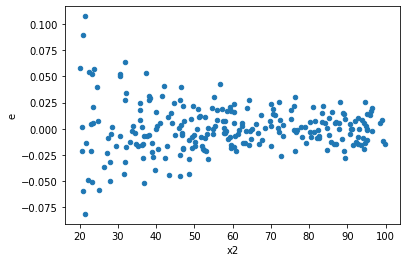

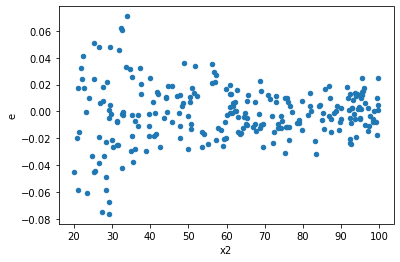

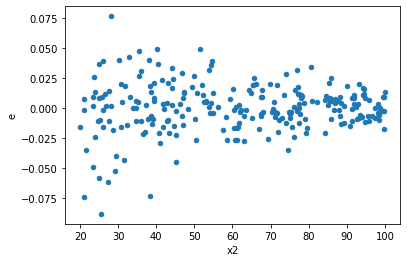

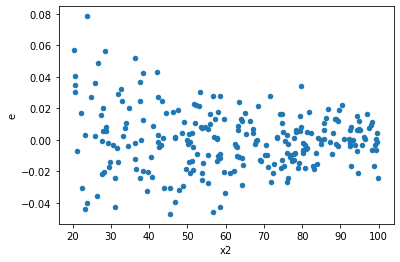

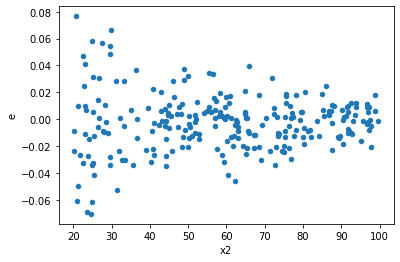

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.0709874727744532,0.013148354049167069,0.0007394528414005542,0.0001369620213454903,0.18522076551369873,5.3811293847156536e-15,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,0.09336669396387376,0.011566532857604162,0.0009725697287903517,0.00012048471726671002,0.12388285765028356,3.2300811694267175e-21,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,0.1004387863470778,0.01558003705845638,0.0010462373577820605,0.00016229205269225396,0.15511972640348087,1.2034783763565517e-17,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,0.12081952190068929,0.013870655692902299,0.0012585366864655133,0.00014448599680106562,0.11480475567767635,1.7911859374366903e-22,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,0.1114972390533252,0.014517498362051308,0.0011614295734721375,0.0001512239412713678,0.1302050031490744,2.0812673383265933e-20,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,0.10293564005456868,0.015872068989645365,0.0010722462505684237,0.00016533405197547256,0.15419410596010477,9.734252437830622e-18,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,0.0857280126870613,0.014210354981913703,0.0008930001321568885,0.00014802453106160107,0.16576092850521,1.231341436960662e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,0.06922982088014583,0.014077157550493376,0.000721143967501519,0.00014663705781763935,0.2033395055992484,1.146936716811991e-13,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,0.05902849312238699,0.014281591026207244,0.0006148801366915312,0.0001487665731896588,0.2419440217895524,2.5136313896421334e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64